# 伽马(Gamma)分布噪声

In [24]:
#coding:utf-8
%matplotlib inline
import numpy as np
import scipy
from scipy.special import comb
import matplotlib.pyplot as plt
import cv2
from scipy import stats
import pandas as pd
from pandas import DataFrame

In [25]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [26]:
def noise_gamma(M,N,a=2,b=0.5):
    c = 0.1
    def gam(z):
        umax = 10
        T = 0
        for i in range(umax):
            T = T + i **(z - 1) * np.exp(-i)
        return T
    
    R = np.zeros((M,N),dtype=np.float64)
    x = np.random.randn(M,N)
    df_x = DataFrame(x)
    idx = df_x > c
    R[idx] = b ** a / (gam(a)) * (x[idx] - c) ** (a - 1) * np.exp(-b * (x[idx] - c))
#     R[~idx] = 0
    return R

In [27]:
noise = noise_gamma(src.shape[0],src.shape[1],1,0.1)

In [30]:
noise_uint = cv2.convertScaleAbs(noise * 255)
src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

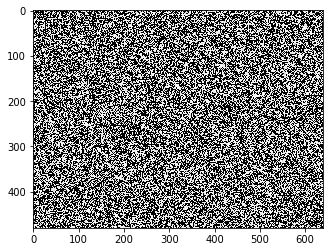

In [31]:
plt.imshow(noise_uint,'gray')

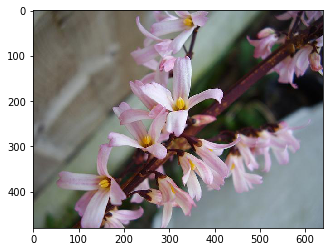

In [32]:
plt.imshow(src)

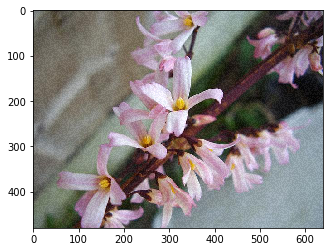

In [33]:
plt.imshow(cv2.convertScaleAbs(src_noise))